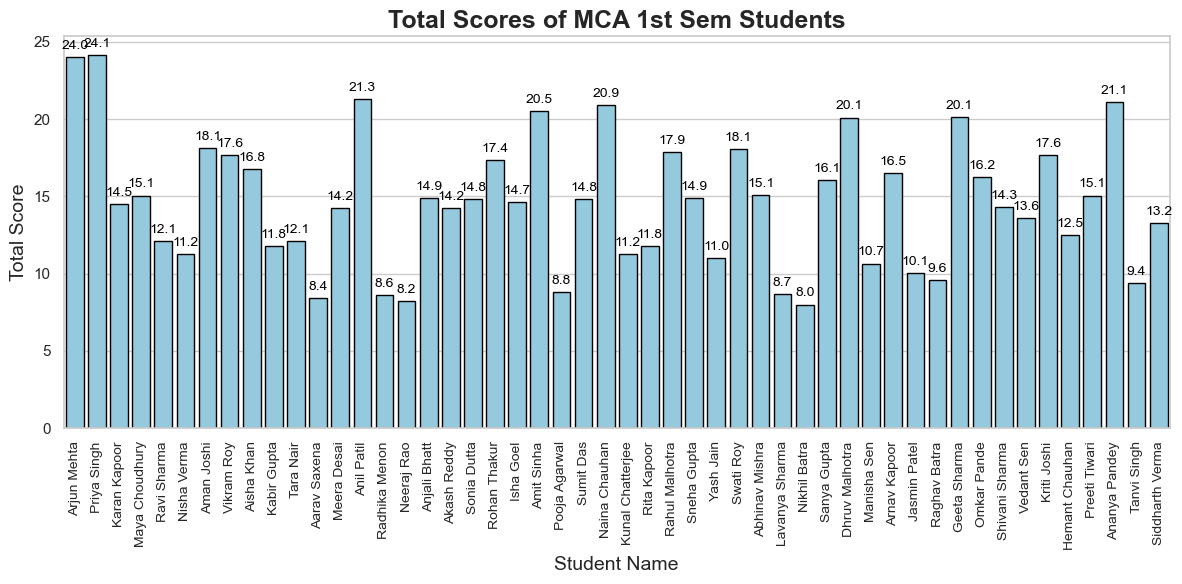

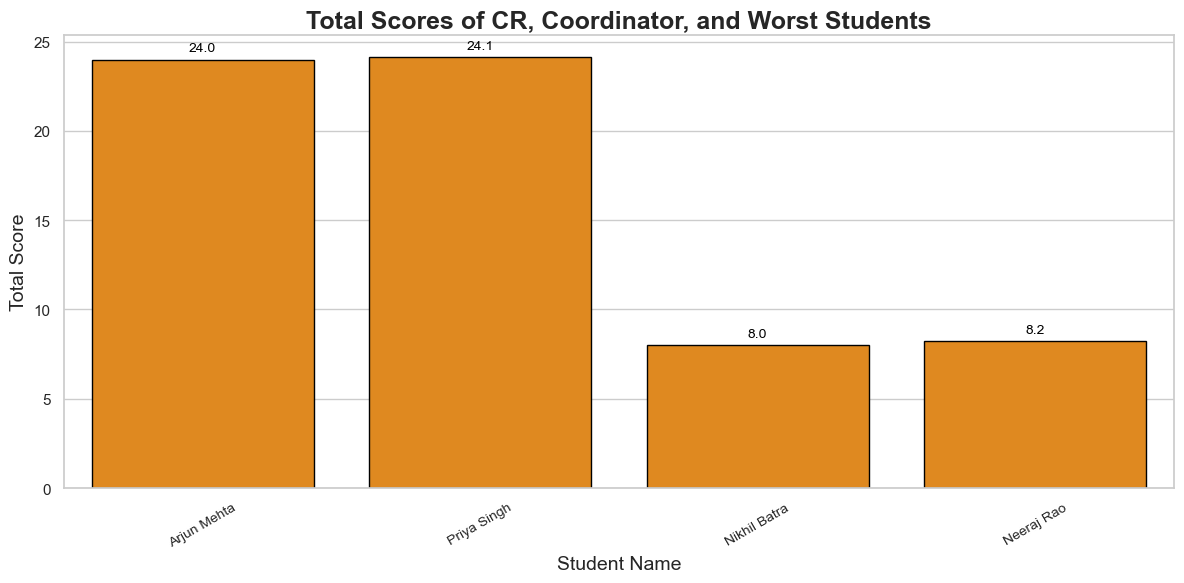


Detailed Data for CR, Coordinator and Worst Students:
            Name  GetUpTime  StudyHours  FitnessHours  Personality  \
0    Arjun Mehta          6           7           1.5            8   
1    Priya Singh          6           6           1.2            9   
33  Nikhil Batra          9           3           1.0            7   
15    Neeraj Rao          8           4           1.0            6   

    TotalScore         Role  
0        24.00           CR  
1        24.15  Coordinator  
33        8.00      Student  
15        8.25      Student  

Improvement Timetable for Worst Students:
- GetUpTime: 6
- StudyHours: 6
- FitnessHours: 1.5
- PersonalityPractice: 8


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set global styles for charts
sns.set_theme(style="whitegrid")
plt.rcParams['font.size'] = 12

# Manually created dataset of students
student_data = {
    'Name': [
        "Arjun Mehta", "Priya Singh", "Karan Kapoor", "Maya Choudhury", "Ravi Sharma",
        "Nisha Verma", "Aman Joshi", "Vikram Roy", "Aisha Khan", "Kabir Gupta",
        "Tara Nair", "Aarav Saxena", "Meera Desai", "Anil Patil", "Radhika Menon",
        "Neeraj Rao", "Anjali Bhatt", "Akash Reddy", "Sonia Dutta", "Rohan Thakur",
        "Isha Goel", "Amit Sinha", "Pooja Agarwal", "Sumit Das", "Naina Chauhan",
        "Kunal Chatterjee", "Rita Kapoor", "Rahul Malhotra", "Sneha Gupta", "Yash Jain",
        "Swati Roy", "Abhinav Mishra", "Lavanya Sharma", "Nikhil Batra", "Sanya Gupta",
        "Dhruv Malhotra", "Manisha Sen", "Arnav Kapoor", "Jasmin Patel", "Raghav Batra",
        "Geeta Sharma", "Omkar Pande", "Shivani Sharma", "Vedant Sen", "Kriti Joshi",
        "Hemant Chauhan", "Preeti Tiwari", "Ananya Pandey", "Tanvi Singh", "Siddharth Verma"
    ],
    'GetUpTime': [6, 6, 7, 8, 7, 8, 7, 8, 7, 9, 7, 9, 8, 7, 9, 8, 7, 8, 9, 7, 8, 7, 9, 8, 7, 8, 9, 8, 7, 9, 8, 7, 8, 9, 7, 8, 9, 8, 7, 8, 7, 9, 8, 7, 8, 9, 8, 7, 8, 9],
    'StudyHours': [7, 6, 5, 4, 5, 4, 5, 4, 6, 3, 5, 3, 4, 5, 3, 4, 5, 4, 3, 6, 4, 5, 3, 4, 5, 4, 3, 4, 5, 3, 4, 5, 4, 3, 4, 5, 4, 5, 4, 3, 6, 4, 5, 3, 4, 5, 4, 5, 3, 4],
    'FitnessHours': [1.5, 1.2, 1.0, 1.4, 1.3, 1.0, 1.3, 1.2, 1.0, 1.4, 1.3, 1.2, 1.0, 1.4, 1.3, 1.0, 1.2, 1.0, 1.4, 1.3, 1.2, 1.0, 1.4, 1.3, 1.2, 1.0, 1.4, 1.3, 1.2, 1.0, 1.4, 1.3, 1.2, 1.0, 1.4, 1.3, 1.2, 1.0, 1.4, 1.3, 1.2, 1.0, 1.4, 1.3, 1.2, 1.0, 1.4, 1.3, 1.2, 1.0],
    'Personality': [8, 9, 7, 8, 6, 7, 8, 9, 7, 8, 6, 7, 8, 9, 7, 6, 7, 8, 9, 7, 8, 9, 7, 8, 9, 7, 8, 9, 7, 8, 9, 7, 6, 7, 8, 9, 7, 8, 6, 7, 8, 9, 7, 8, 9, 7, 8, 9, 7, 8]
}

# Create DataFrame
df = pd.DataFrame(student_data)

# Normalization process
df['NormalizedGetUpTime'] = 10 - df['GetUpTime']
df['NormalizedStudyHours'] = (df['StudyHours'] - df['StudyHours'].min()) / (df['StudyHours'].max() - df['StudyHours'].min()) * 9 + 1  # Scaling to range [1, 10]
df['NormalizedFitnessHours'] = df['FitnessHours'] * 2
df['NormalizedPersonality'] = (df['Personality'] - df['Personality'].min()) / (df['Personality'].max() - df['Personality'].min()) * 9 + 1  # Scaling to range [1, 10]

# Calculate total scores
df['TotalScore'] = (
    df['NormalizedGetUpTime']
    + df['NormalizedStudyHours']
    + df['NormalizedFitnessHours']
    + df['NormalizedPersonality']  # Update here
)

# Assign roles manually
df['Role'] = 'Student'
df.loc[df['Name'] == "Arjun Mehta", 'Role'] = 'CR'
df.loc[df['Name'] == "Priya Singh", 'Role'] = 'Coordinator'

# Identify the worst students (bottom 2 based on TotalScore)
worst_students = df.nsmallest(2, 'TotalScore')

# Filter data for CR, Coordinator, and worst students
highlighted_students = pd.concat([df[df['Role'] == 'CR'], df[df['Role'] == 'Coordinator'], worst_students])

# Plot bar chart for all students with total scores
plt.figure(figsize=(12, 6))
sns.barplot(x='Name', y='TotalScore', data=df, edgecolor='black', color='skyblue')
plt.title('Total Scores of MCA 1st Sem Students', fontsize=18, weight='bold')
plt.xlabel('Student Name', fontsize=14)
plt.ylabel('Total Score', fontsize=14)
plt.xticks(rotation=90, fontsize=10)

# Annotate the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 8),
                       textcoords='offset points')

plt.tight_layout()
plt.show()

# Plot bar chart for CR, Coordinator, and worst students
plt.figure(figsize=(12, 6))
bar = sns.barplot(x='Name', y='TotalScore', data=highlighted_students, edgecolor='black', color='darkorange')
plt.title('Total Scores of CR, Coordinator, and Worst Students', fontsize=18, weight='bold')
plt.xlabel('Student Name', fontsize=14)
plt.ylabel('Total Score', fontsize=14)
plt.xticks(rotation=30, fontsize=10)

# Annotate the bars
for p in bar.patches:
    bar.annotate(f'{p.get_height():.1f}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 8),
                 textcoords='offset points')

plt.tight_layout()
plt.show()

# Show detailed attributes for CR, Coordinator, and worst students
print("\nDetailed Data for CR, Coordinator and Worst Students:")
print(highlighted_students[['Name', 'GetUpTime', 'StudyHours', 'FitnessHours', 'Personality', 'TotalScore', 'Role']])

# Improvement timetable for worst students
improvement_timetable = {
    'GetUpTime': 6,
    'StudyHours': 6,
    'FitnessHours': 1.5,
    'PersonalityPractice': 8,  # Updated here for personality
}

print("\nImprovement Timetable for Worst Students:")
for key, value in improvement_timetable.items():
    print(f"- {key}: {value}")
